<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/6%EC%9D%BC%EC%B0%A8/%EA%B1%B0%EB%A6%AC(distance)%EC%97%90_%EB%8C%80%ED%95%98%EC%97%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

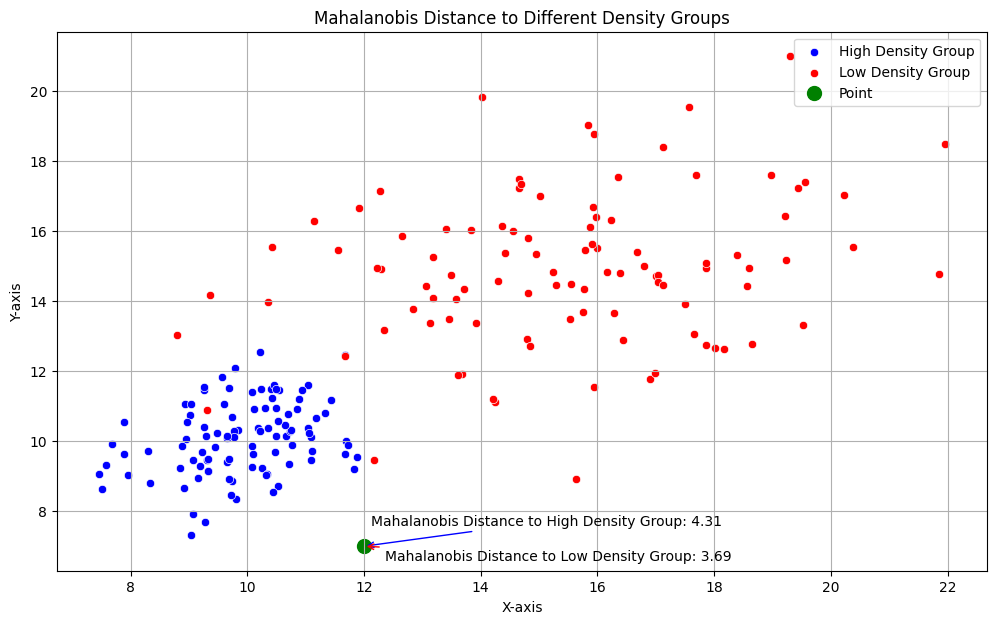

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import seaborn as sns

# 밀집도가 높은 그룹 생성
np.random.seed(0)
high_density_group = np.random.multivariate_normal(mean=[10, 10], cov=[[1, 0.3], [0.3, 1]], size=100)

# 밀집도가 낮은 그룹 생성
low_density_group = np.random.multivariate_normal(mean=[15, 15], cov=[[8, 1], [1, 5]], size=100)

# 특정 포인트
point = np.array([12, 7])

# 평균 및 공분산 계산
mean_high = np.mean(high_density_group, axis=0)
mean_low = np.mean(low_density_group, axis=0)
cov_high = np.cov(high_density_group, rowvar=False)
cov_low = np.cov(low_density_group, rowvar=False)

# 마하놀라비스 거리 계산
dist_high = mahalanobis(point, mean_high, np.linalg.inv(cov_high))
dist_low = mahalanobis(point, mean_low, np.linalg.inv(cov_low))

# 시각화
plt.figure(figsize=(12, 7))
sns.scatterplot(x=high_density_group[:, 0], y=high_density_group[:, 1], label='High Density Group', color='blue')
sns.scatterplot(x=low_density_group[:, 0], y=low_density_group[:, 1], label='Low Density Group', color='red')
plt.scatter(point[0], point[1], label='Point', color='green', s=100)

# Annotate distances
plt.annotate(f'Mahalanobis Distance to High Density Group: {dist_high:.2f}',
             xy=(point[0], point[1]), xytext=(5, 15),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))
plt.annotate(f'Mahalanobis Distance to Low Density Group: {dist_low:.2f}',
             xy=(point[0], point[1]), xytext=(15, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

plt.legend()
plt.title('Mahalanobis Distance to Different Density Groups')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


### **왜 포인트(1,5)가 파란색그룹 근처에 있는데 빨강색그룹과 더 가깝다고 하나? 유클리드거리가 아니라 공분산을 보아라**

$$
D_M(x) = \sqrt{(x - \mu)^T S^{-1} (x - \mu)}
$$

**공분산이 작은그룹(파란색)의 역수라 거리가 상대적으로 붉은색그룹보다 더 멀다. 붉은색의 공분산은 아주 크기떄문에 그 역수는 작아지게 되니 거리도 적어지게 된다.**

